# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = url + "&appid=" + weather_api_key + "&units=" + units + "&q=" #+ str(city)


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = requests.get(query_url + cities[i])
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url.json() 

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] 
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country'] 
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jacareacanga
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | kargat
Processing Record 4 of Set 1 | warrington
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | saskylakh
Processing Record 9 of Set 1 | mayumba
Processing Record 10 of Set 1 | houlton
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | bulungu
Processing Record 13 of Set 1 | iseyin
Processing Record 14 of Set 1 | yulara
Processing Record 15 of Set 1 | shirokiy
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | iquitos
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | castro
Processing Record 23 of Set 1 | kaitangata
Proces

Processing Record 41 of Set 4 | wilmington
Processing Record 42 of Set 4 | hilo
Processing Record 43 of Set 4 | fortuna
Processing Record 44 of Set 4 | alice springs
Processing Record 45 of Set 4 | camacha
Processing Record 46 of Set 4 | bambous virieux
Processing Record 47 of Set 4 | alotau
City not found. Skipping...
Processing Record 48 of Set 4 | artyom
Processing Record 49 of Set 4 | pisco
Processing Record 50 of Set 4 | touros
Processing Record 1 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 2 of Set 5 | havoysund
Processing Record 3 of Set 5 | vuktyl
Processing Record 4 of Set 5 | biscarrosse
Processing Record 5 of Set 5 | uk
City not found. Skipping...
Processing Record 6 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 8 of Set 5 | ust-kuyga
Processing Record 9 of Set 5 | kodinsk
Processing Record 10 of Set 5 | samusu
City not found. Skipping...
Processing Record 11 o

Processing Record 31 of Set 8 | praia da vitoria
Processing Record 32 of Set 8 | saint george
Processing Record 33 of Set 8 | dahanu
Processing Record 34 of Set 8 | katangli
Processing Record 35 of Set 8 | qena
Processing Record 36 of Set 8 | bahir dar
Processing Record 37 of Set 8 | siva
Processing Record 38 of Set 8 | sorata
Processing Record 39 of Set 8 | restrepo
Processing Record 40 of Set 8 | bairiki
Processing Record 41 of Set 8 | warqla
City not found. Skipping...
Processing Record 42 of Set 8 | darnah
Processing Record 43 of Set 8 | nantucket
Processing Record 44 of Set 8 | vanimo
Processing Record 45 of Set 8 | kununurra
Processing Record 46 of Set 8 | chateau-gontier
Processing Record 47 of Set 8 | gashua
Processing Record 48 of Set 8 | shache
Processing Record 49 of Set 8 | storforshei
Processing Record 50 of Set 8 | three hills
Processing Record 1 of Set 9 | east london
Processing Record 2 of Set 9 | stromness
Processing Record 3 of Set 9 | mailsi
Processing Record 4 of Se

Processing Record 21 of Set 12 | mandera
Processing Record 22 of Set 12 | omboue
Processing Record 23 of Set 12 | sao felix do xingu
Processing Record 24 of Set 12 | jalu
Processing Record 25 of Set 12 | moussoro
Processing Record 26 of Set 12 | nosy varika
Processing Record 27 of Set 12 | pingliang
Processing Record 28 of Set 12 | beloostrov
Processing Record 29 of Set 12 | krasnyy tekstilshchik
City not found. Skipping...
Processing Record 30 of Set 12 | kuala terengganu
Processing Record 31 of Set 12 | lodi
Processing Record 32 of Set 12 | opobo
City not found. Skipping...
Processing Record 33 of Set 12 | frontera
Processing Record 34 of Set 12 | springfield
Processing Record 35 of Set 12 | marabba
Processing Record 36 of Set 12 | hobyo
Processing Record 37 of Set 12 | bay-khaak
Processing Record 38 of Set 12 | glendive
Processing Record 39 of Set 12 | kidal
Processing Record 40 of Set 12 | kiunga
Processing Record 41 of Set 12 | andarab
City not found. Skipping...
Processing Record

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jacareacanga,-6.2222,-57.7528,22.25,99,100,0.62,BR,1675668360
1,upernavik,72.7868,-56.1549,-26.60,94,100,7.03,GL,1675668157
2,kargat,55.1956,80.2811,-11.63,91,100,2.87,RU,1675668361
3,warrington,53.3925,-2.5802,1.69,87,0,2.06,GB,1675668361
4,hithadhoo,-0.6000,73.0833,27.48,71,25,5.71,MV,1675668082


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jacareacanga,-6.2222,-57.7528,22.25,99,100,0.62,BR,1675668360
1,upernavik,72.7868,-56.1549,-26.60,94,100,7.03,GL,1675668157
2,kargat,55.1956,80.2811,-11.63,91,100,2.87,RU,1675668361
3,warrington,53.3925,-2.5802,1.69,87,0,2.06,GB,1675668361
4,hithadhoo,-0.6000,73.0833,27.48,71,25,5.71,MV,1675668082


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

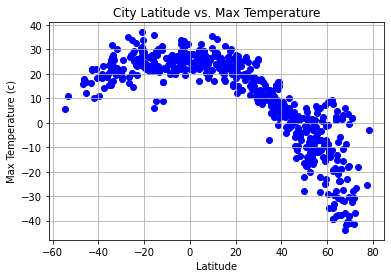

In [15]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color="blue", vmin=2, vmax=15)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

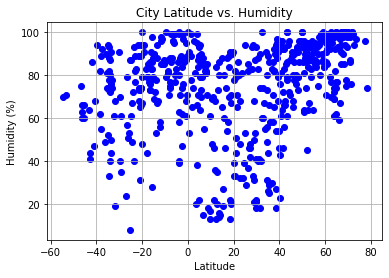

In [16]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color="blue", vmin=2, vmax=15)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

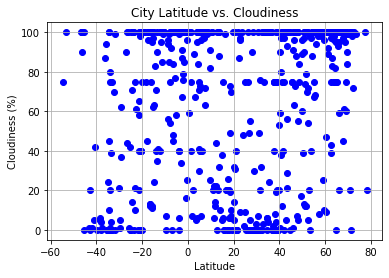

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="blue", vmin=2, vmax=15)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

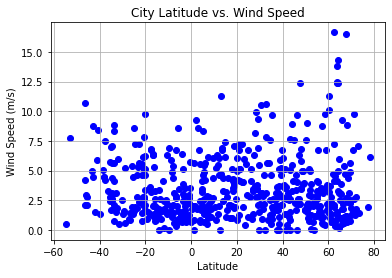

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color="blue", vmin=2, vmax=15)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is: 0.6134370600181925


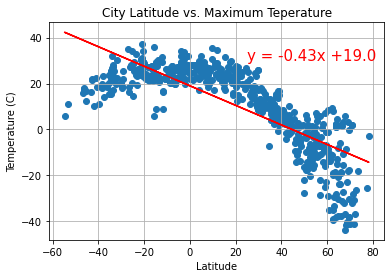

In [19]:
# Define a function to create Linear Regression plots on latitude vs temperature

x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Maximum Teperature")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.annotate(line_eq,(25,30),fontsize=15,color="red")
plt.grid(True)
# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

The r-value is: 0.054179027002623295


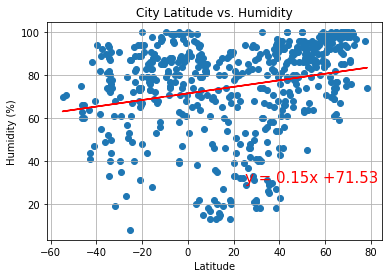

In [20]:
# Define a function to create Linear Regression plots on latitude vs humidity

x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(25,30),fontsize=15,color="red")
plt.grid(True)
# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

The r-value is: 0.0588736306672808


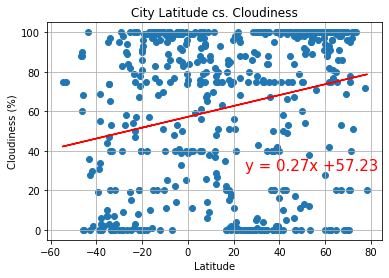

In [34]:
# Define a function to create Linear Regression plots on latitude vs cloudiness

x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude cs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(25,30),fontsize=15,color="red")
plt.grid(True)
# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Fig7.png")

# Show plot
plt.show()

The r-value is: 0.00013680778266028282


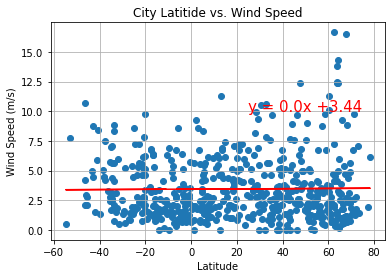

In [21]:
# Define a function to create Linear Regression plots on latitude vs wind speed

x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitide vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.annotate(line_eq,(25,10),fontsize=15,color="red")
plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df.loc[city_data_df["Lat"]>= 0, :]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,upernavik,72.7868,-56.1549,-26.60,94,100,7.03,GL,1675668157
2,kargat,55.1956,80.2811,-11.63,91,100,2.87,RU,1675668361
3,warrington,53.3925,-2.5802,1.69,87,0,2.06,GB,1675668361
7,saskylakh,71.9167,114.0833,-41.22,100,98,1.76,RU,1675668362
9,houlton,46.1262,-67.8403,-5.77,65,100,0.00,US,1675668363


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df =city_data_df.loc[city_data_df["Lat"]<0, :]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jacareacanga,-6.2222,-57.7528,22.25,99,100,0.62,BR,1675668360
4,hithadhoo,-0.6000,73.0833,27.48,71,25,5.71,MV,1675668082
5,cidreira,-30.1811,-50.2056,20.32,91,21,2.54,BR,1675668361
6,puerto ayora,-0.7393,-90.3518,25.86,95,16,2.24,EC,1675668362
8,mayumba,-3.4320,10.6554,25.11,88,100,3.85,GA,1675668362


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7618613941011786


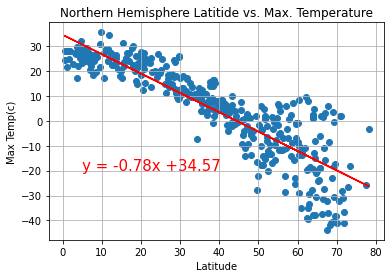

In [24]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere Latitide vs. Max. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temp(c)')
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")
plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig9.png")

# Show plot
plt.show()

The r-value is: 0.16363433766509397


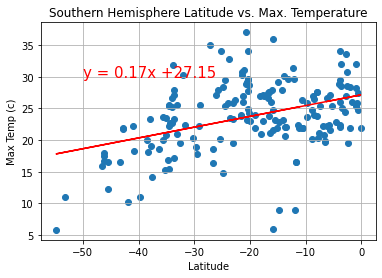

In [25]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere Latitude vs. Max. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (c)')
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
-Lat Vs. Max Temp: shows a moderate negative correlation. As the latitude changes from negative to zero the temperature increase, but as the latitude is changing from zero to postive the temperature decrrease.

-Lat Vs. Humidity: reveals a no correlation. The humidity is all over the place both with negative and positive latitude.

-Lat Vs. Cloudiness: No correlation.

-Lat Vs. Wind Speed: reveals no correlation as well.

-Northern hemisphere Lat Vs. Temp: reveals a strong negative correlation. As the temperature decreases the latitude increases.

-Southern hemisphere Lat Vs. Temp: reveals none or very weak correlation. but to some extent, the increase in temperature shows changes in latitude from negative to the positive direction.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.19780717442900392


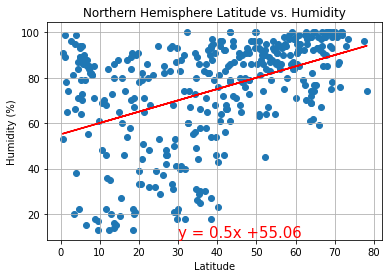

In [26]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(30,10),fontsize=15,color="red")
plt.grid(True)
# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()

The r-value is: 0.09676035534788585


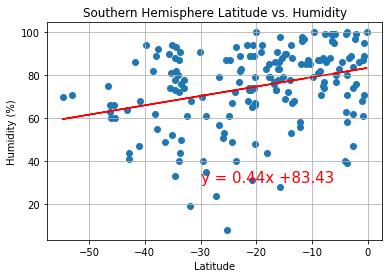

In [27]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.grid(True)
# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

-Northern Hemisphere Lat Vs. Humidity: reveals a very weak correlation in a positive direction. The humidity is constantly changing with low latitude, but as the latitude increases to approximately 35 the humidity increases steadily.

-Southern Hemisphere Lat Vs. Humidity: shows a extremely weak correlation but also changes patttern around negative 30 latitude which reveals increase both humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08702813190272359


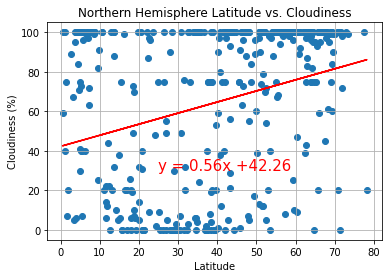

In [28]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(25,30),fontsize=15,color="red")
plt.grid(True)
# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig13.png")

# Show plot
plt.show()

The r-value is: 0.12180509992040799


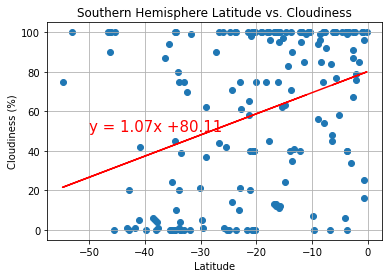

In [29]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.grid(True)
# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig14.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

-Nothern Hemisphere Lat Vs.Cloudiness: reveals none or very weak correlation.

-Southern Hemisphere Lat Vs. Cloudiness: shows none or very weak correlation. But there is still some correction in postive direction compared to the Northern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00020538777267722897


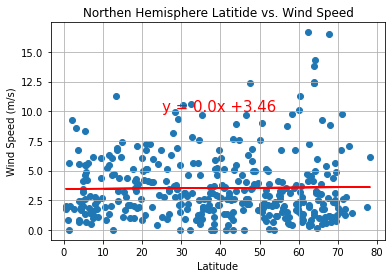

In [30]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northen Hemisphere Latitide vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.annotate(line_eq,(25,10),fontsize=15,color="red")
plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig15.png")

# Show plot
plt.show()

The r-value is: 0.07467747121846242


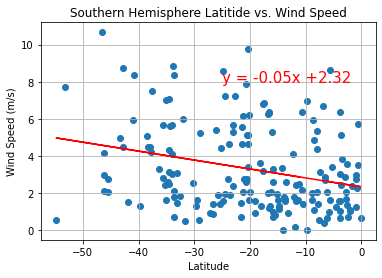

In [31]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere Latitide vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.annotate(line_eq,(-25,8),fontsize=15,color="red")
plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig16.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

-Northern Hemisphere Lat Vs. Wind Speed: shows no correlation at all. The increase in lattitude has little to no effect on the wind speed.

-Southern Hemisphere Lat Vs. Wind Speed: reveals none to very weak correlation.